In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Exploration


In [3]:
full_data.shape

(145460, 23)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Label Conversion 
Both "RainToday" and "RainTomorrow" (label) are object (Yes/No). We will convert them into binary (1/0) for our convenience.

In [5]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [6]:
full_data[["RainToday", "RainTomorrow"]]

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0
145458,0.0,0.0


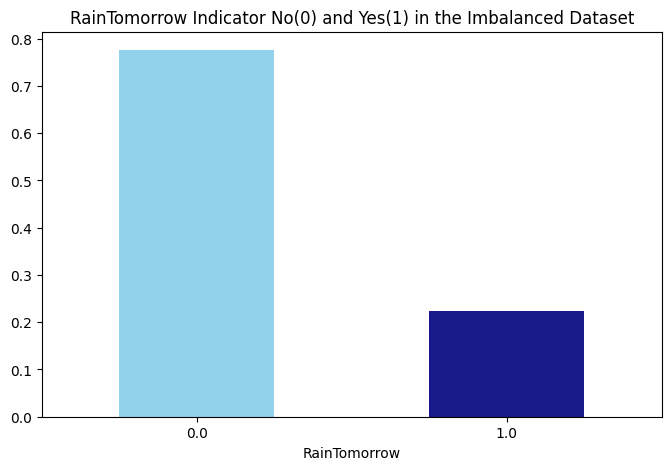

In [7]:
# Plotting labels
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe the presence of "0" and "1". There is a class imbalance. For tackling class imbalance, we will use **oversampling of minority class** (duplicating the samples of minority class such that total number of samples remain same) . Since the size of the data set is quite small, undersampling of majority class would not make much sense here. 

# Handling Class Imbalance

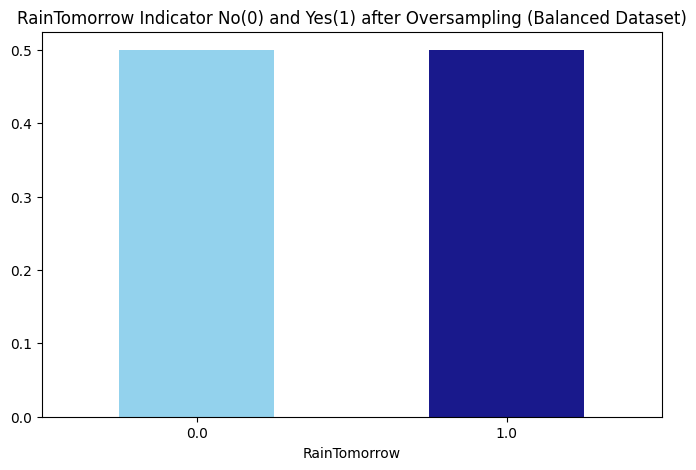

In [8]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

# Imputing missing values

In [9]:
# Checking for columns with missing values
total = oversampled.isnull().sum().sort_values(ascending=False)
missing = pd.concat([total], axis=1, keys=['Total'])
missing

,Total
Sunshine,104831
Evaporation,95411
Cloud3pm,85614
Cloud9am,81339
Pressure3pm,21746
Pressure9am,21728
WindGustDir,15491
WindGustSpeed,15354
WindDir9am,14728
WindDir3pm,6440


We can observe these missing values as NaN below.

In [10]:
pd.set_option('display.max_columns', None)

oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,2010-06-08,Launceston,1.1,11.8,0.4,NaN,NaN,WNW,13.0,NaN,NaN,0.0,0.0,97.0,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,1.0
117307,2016-08-08,PearceRAAF,9.6,14.8,11.8,NaN,4.3,W,69.0,WNW,WSW,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,2009-03-18,Cairns,24.8,31.5,0.0,5.4,3.4,SE,48.0,SSE,ESE,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,2012-08-17,Ballarat,4.2,7.9,11.4,NaN,NaN,SW,63.0,NNW,SSW,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


We will impute categorical columns with mode, and numerical columns with median

In [11]:
# Categorical columns
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [12]:
# Imputing categorical columns with mode
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

# Imputing numerical columns with median
oversampled['Sunshine'] = oversampled['Sunshine'].fillna(oversampled['Sunshine'].median())
oversampled['Evaporation'] = oversampled['Evaporation'].fillna(oversampled['Evaporation'].median())
oversampled['Cloud3pm'] = oversampled['Cloud3pm'].fillna(oversampled['Cloud3pm'].median())
oversampled['Cloud9am'] = oversampled['Cloud9am'].fillna(oversampled['Cloud9am'].median())
oversampled['Pressure3pm'] = oversampled['Pressure3pm'].fillna(oversampled['Pressure3pm'].median())
oversampled['Pressure9am'] = oversampled['Pressure9am'].fillna(oversampled['Pressure9am'].median())
oversampled['WindGustSpeed'] = oversampled['WindGustSpeed'].fillna(oversampled['WindGustSpeed'].median())
oversampled['Humidity3pm'] = oversampled['Humidity3pm'].fillna(oversampled['Humidity3pm'].median())
oversampled['Temp3pm'] = oversampled['Temp3pm'].fillna(oversampled['Temp3pm'].median())
oversampled['WindSpeed3pm'] = oversampled['WindSpeed3pm'].fillna(oversampled['WindSpeed3pm'].median())
oversampled['Humidity9am'] = oversampled['Humidity9am'].fillna(oversampled['Humidity9am'].median())
oversampled['Rainfall'] = oversampled['Rainfall'].fillna(oversampled['Rainfall'].median())
oversampled['RainToday'] = oversampled['RainToday'].fillna(oversampled['RainToday'].median())
oversampled['WindSpeed9am'] = oversampled['WindSpeed9am'].fillna(oversampled['WindSpeed9am'].median())
oversampled['Temp9am'] = oversampled['Temp9am'].fillna(oversampled['Temp9am'].median())
oversampled['MinTemp'] = oversampled['MinTemp'].fillna(oversampled['MinTemp'].median())
oversampled['MaxTemp'] = oversampled['MaxTemp'].fillna(oversampled['MaxTemp'].median())

In [13]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.4,6.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.4,6.8,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,6.0,6.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,4.4,6.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,4.4,6.8,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,6.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,4.4,6.8,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,2010-06-08,Launceston,1.1,11.8,0.4,4.4,6.8,WNW,13.0,N,W,0.0,0.0,97.0,98.0,1020.1,1013.3,6.0,6.0,4.0,9.5,0.0,1.0
117307,2016-08-08,PearceRAAF,9.6,14.8,11.8,4.4,4.3,W,69.0,WNW,WSW,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,2009-03-18,Cairns,24.8,31.5,0.0,5.4,3.4,SE,48.0,SSE,ESE,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,2012-08-17,Ballarat,4.2,7.9,11.4,4.4,6.8,SW,63.0,NNW,SSW,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


# Conversion of categorical features into numerical

In [14]:
# Using Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [15]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.4,6.8,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,4.4,6.8,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.0,6.0,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,4.4,6.8,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,4.4,6.8,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,6.0,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,4.4,6.8,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,950,17,1.1,11.8,0.4,4.4,6.8,14,13.0,3,13,0.0,0.0,97.0,98.0,1020.1,1013.3,6.0,6.0,4.0,9.5,0.0,1.0
117307,3114,29,9.6,14.8,11.8,4.4,4.3,13,69.0,14,15,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,503,8,24.8,31.5,0.0,5.4,3.4,9,48.0,10,2,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,1721,5,4.2,7.9,11.4,4.4,6.8,12,63.0,6,11,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


# Improving imputation

Using Multiple Imputation by Chained Equations (MICE) on the whole numeric dataset to iteratively improve the imputations 

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [17]:
MiceImputed

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.4,6.8,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,4.4,6.8,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.0,6.0,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,4.4,6.8,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,4.4,6.8,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,6.0,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,4.4,6.8,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,950,17,1.1,11.8,0.4,4.4,6.8,14,13.0,3,13,0.0,0.0,97.0,98.0,1020.1,1013.3,6.0,6.0,4.0,9.5,0.0,1.0
117307,3114,29,9.6,14.8,11.8,4.4,4.3,13,69.0,14,15,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,503,8,24.8,31.5,0.0,5.4,3.4,9,48.0,10,2,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,1721,5,4.2,7.9,11.4,4.4,6.8,12,63.0,6,11,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


In [18]:
oversampled.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
87307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Detecting and removing outliers

Using inter-quartile range (IQR) which tells you the spread or range between the upper 25% and lower 25% boundaries.

In [19]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.0
Location           25.0
MinTemp             9.2
MaxTemp            10.2
Rainfall            2.2
Evaporation         1.0
Sunshine            0.7
WindGustDir         9.0
WindGustSpeed      17.0
WindDir9am          8.0
WindDir3pm          8.0
WindSpeed9am       13.0
WindSpeed3pm       11.0
Humidity9am        26.0
Humidity3pm        30.0
Pressure9am         8.5
Pressure3pm         8.6
Cloud9am            2.0
Cloud3pm            2.0
Temp9am             9.2
Temp3pm             9.6
RainToday           1.0
RainTomorrow        1.0
dtype: float64


In [20]:
MiceImputed.shape

(220632, 23)

In [21]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(76089, 23)

# Feature Correlation

<Axes: >

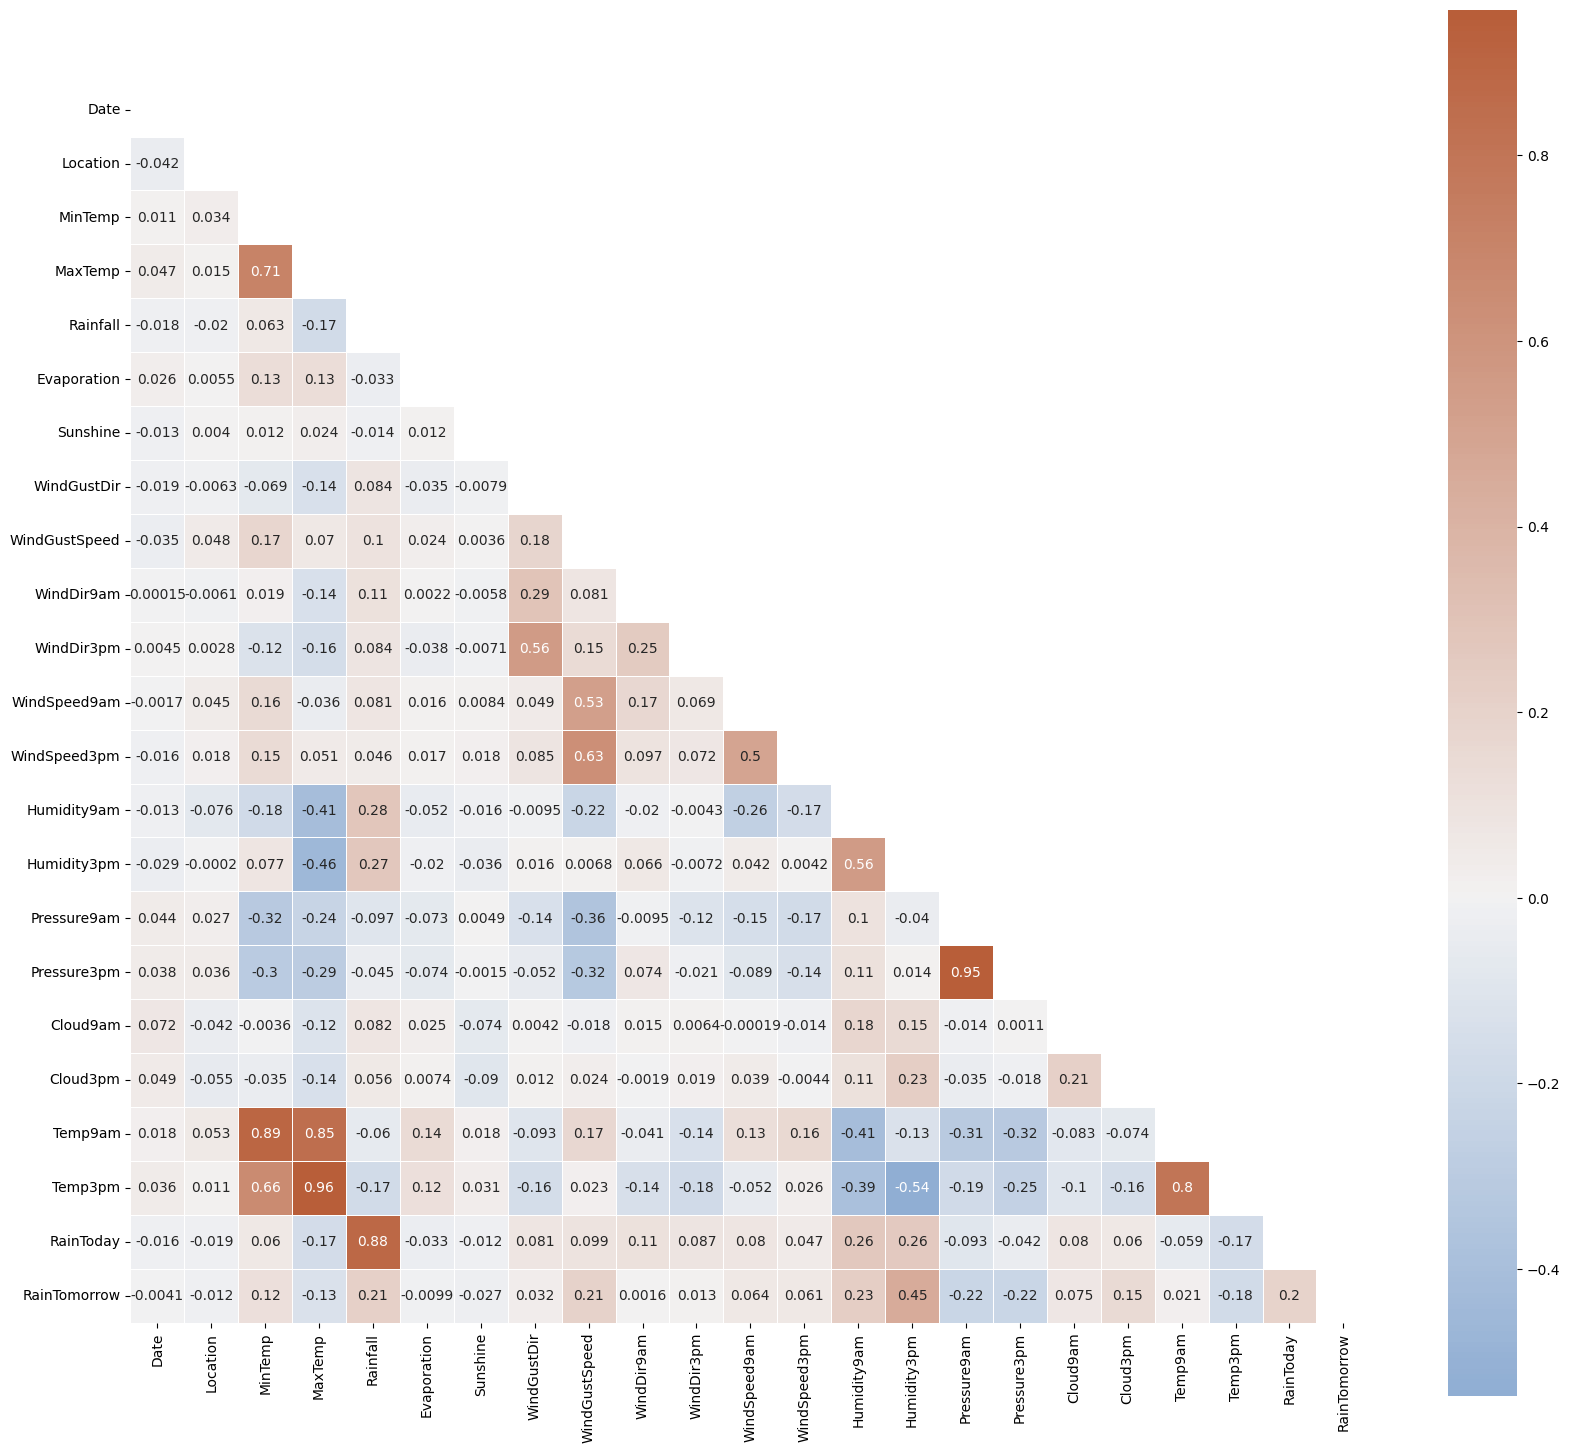

In [22]:
# Correlation Heatmap
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following pairs of features are having high correlation between them:

* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* Evaporation and MaxTemp
* MaxTemp and Temp3pm
But in no case, the correlation value is equal to a perfect "1". So we are not discarding any feature except for date. 

# Feature Selection

In [23]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Splitting dataset
75% training set 25% test set

In [24]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Feature Scaling
To prevent features with larger values from dominating those with smaller values 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up evaluation metrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n Evaluation for {name}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1.0))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=1.0))
    print("F1 Score :", f1_score(y_test, y_pred, pos_label=1.0))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Model Training

**Model-1: Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, "Logistic Regression")


 Evaluation for Logistic Regression:
Accuracy : 0.7414708510750144
Precision: 0.7366132438812275
Recall   : 0.6793858141400252
F1 Score : 0.7068431092036243

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10296
         1.0       0.74      0.68      0.71      8727

    accuracy                           0.74     19023
   macro avg       0.74      0.74      0.74     19023
weighted avg       0.74      0.74      0.74     19023



**Model-2: Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree")


 Evaluation for Decision Tree:
Accuracy : 0.8959154707459391
Precision: 0.8383311603650587
Recall   : 0.9578320155838204
F1 Score : 0.8941063215317147

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90     10296
         1.0       0.84      0.96      0.89      8727

    accuracy                           0.90     19023
   macro avg       0.90      0.90      0.90     19023
weighted avg       0.90      0.90      0.90     19023



**Model-3: Neural Network (Multilayer Perceptron)**

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=123)
mlp.fit(X_train, y_train)
evaluate_model(mlp, "Neural Network (MLP)")


 Evaluation for Neural Network (MLP):
Accuracy : 0.7846291331546024
Precision: 0.766030797517812
Recall   : 0.763836369886559
F1 Score : 0.7649320098686098

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80     10296
         1.0       0.77      0.76      0.76      8727

    accuracy                           0.78     19023
   macro avg       0.78      0.78      0.78     19023
weighted avg       0.78      0.78      0.78     19023



# Model Comparison

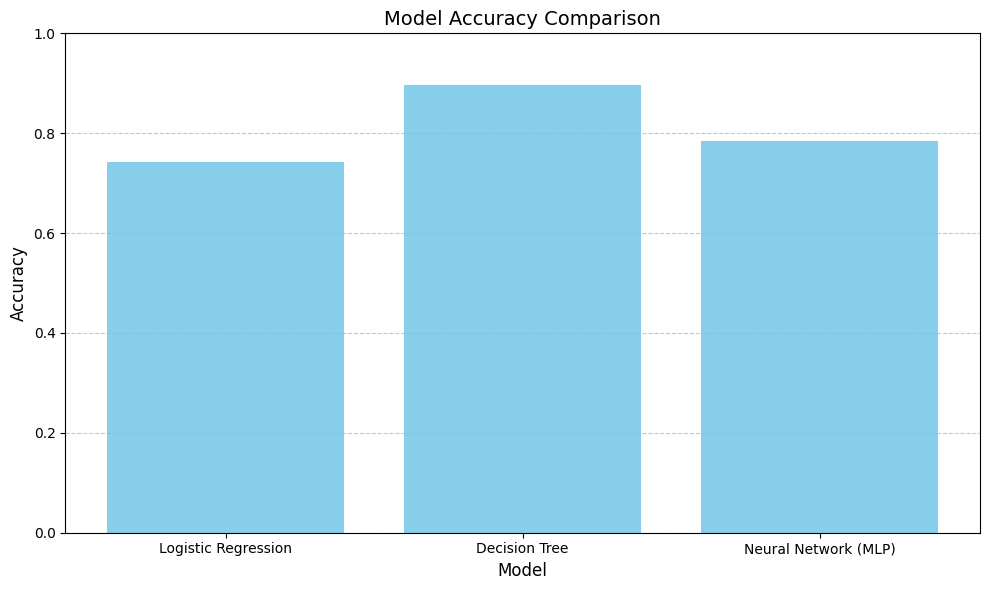

In [30]:
# Calculating accuracy scores again to store in array
accuracy_lr = accuracy_score(y_test, log_reg.predict(X_test))
accuracy_dt = accuracy_score(y_test, dt.predict(X_test))
accuracy_mlp = accuracy_score(y_test, mlp.predict(X_test))

models = ['Logistic Regression', 'Decision Tree', 'Neural Network (MLP)']
accuracies = [accuracy_lr, accuracy_dt, accuracy_mlp]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusion
We can observe that **Decision Tree** has performed better compared to other models. 